**Problem**: Google slides automatically resizes images when placed into a slide. There does not seem to be a way to disable this "feature".

**Solution**: Write methods to produce plots individually, or package them into a single figure object.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# Settings for the individual figures
FIG_HIGH = 8
FIG_WIDE = 8

TITLE_SIZE = 15
LABEL_SIZE = 12
TICK_SIZE = 10
ANNOT_SIZE = 8

In [43]:
def get_data() -> np.ndarray:
    '''
    Create some random data for testing
    '''
    return np.random.rand(8, 8) #creating under the assumption its in the decimal form

def format_data(array):
    '''
    Cleans the array of probabilities in decimal form to return whole numbers 
    representing the percent out of 100 and fill the 'nonsense' diagonal with None
    '''
    #takes the original decimal probabilities and puts them in the whole number format of percent and fills the 'nonsense' diagonal
    flipped = np.flip((np.round((array)*100,0)),0)
    np.fill_diagonal(flipped, None)
    return np.flip(flipped, 0)

def make_annots(wins, ties):
    '''
    Uses two 8x8 arrays for wins and ties respectively to return one array of strings in the form [win(tie)]
    The input arrays will need to already have gone through the format_data function or be in that format already
    '''
    annots = []
    for i in range(8):
        row = []
        prob = wins[i]
        tie = ties[i]
        for j in range(8):
            win_val = prob[j]
            tie_val = tie[j]
            row.append(f'{str(win_val)[:-2]}({str(tie_val)[:-2]})')
        annots.append(row)
    annots = np.array(annots)
    flipped = np.flip(annots,0)
    np.fill_diagonal(flipped, '')
    return np.flip(flipped,0)




def make_heatmap(data: np.ndarray,
                 annots: np.ndarray,
                 ax: plt.Axes = None,
                 hide_yticks: bool = False,
                 title: str = None
                ) -> [plt.Figure, plt.Axes]:
    '''
    If ax is None, create a new figure.
    Otherwise, add the heatmap to the provided ax.
    '''

    seqs = [f'{n:b}'.zfill(3) for n in range(8)]
    
    settings = {
        'vmin': 0,
        'vmax': 100,
        'linewidth': 1,
        'cmap': 'Blues',
        'cbar': False,
        'annot': annots,
        'fmt': ''
    }

    if ax is None:
        # Create a new figure
        fig, ax = plt.subplots(1, 1, figsize=(FIG_WIDE, FIG_HIGH))
    else:
        # Get the parent figure
        fig = ax.get_figure()

    sns.heatmap(data=data, ax=ax, **settings)

    ax.set_xticklabels(seqs, fontsize=LABEL_SIZE)
    ax.set_yticklabels(seqs[::-1], fontsize=LABEL_SIZE)

    ax.set_title(title, fontsize=TITLE_SIZE)

    
    if hide_yticks:
        ax.set_yticks([])
    
    return fig, ax





def make_heatmap_package(data1: np.ndarray,
                         data2: np.ndarray):
                        #) -> [plt.Figure, plt.Axes]:

    fig, ax = plt.subplots(1, 2, 
                           figsize=(FIG_WIDE*2, FIG_HIGH), 
                           #sharey=True, 
                           gridspec_kw=gridspec_kw)
    make_heatmap(data1, ax[0], 
                 title='My Chance of Winning\nby Cards (n=1M)\nTeam 1'
                )
    make_heatmap(data2, ax[1], 
                 title='My Chance of Winning\nby Cards (n=1M)\nTeam 2',
                 hide_yticks=True)
    return fig, ax


In [35]:
data = get_data()
print(data)

[[0.2864858  0.80394769 0.3523236  0.46118291 0.02852598 0.00490651
  0.63735744 0.2863504 ]
 [0.71525712 0.88045932 0.33664947 0.20365811 0.64145966 0.35958968
  0.0422443  0.58986359]
 [0.46392421 0.10381168 0.45379476 0.12485001 0.26681778 0.30234044
  0.31362073 0.92425839]
 [0.93073036 0.71744177 0.10500208 0.52581122 0.4733326  0.6562425
  0.57674291 0.24628769]
 [0.6876122  0.34234343 0.32629918 0.48157333 0.22503947 0.3136394
  0.26672758 0.62081904]
 [0.68420873 0.74566004 0.42054366 0.0967779  0.58905859 0.35224445
  0.38218067 0.39648236]
 [0.02151246 0.92332396 0.74152471 0.58308922 0.53970297 0.34405817
  0.30089202 0.54292903]
 [0.5486078  0.73655088 0.80172651 0.94487216 0.45611086 0.78917359
  0.86924076 0.22771584]]


In [36]:
clean = format_data(data)
print(clean)

[[29. 80. 35. 46.  3.  0. 64. nan]
 [72. 88. 34. 20. 64. 36. nan 59.]
 [46. 10. 45. 12. 27. nan 31. 92.]
 [93. 72. 11. 53. nan 66. 58. 25.]
 [69. 34. 33. nan 23. 31. 27. 62.]
 [68. 75. nan 10. 59. 35. 38. 40.]
 [ 2. nan 74. 58. 54. 34. 30. 54.]
 [nan 74. 80. 94. 46. 79. 87. 23.]]


In [37]:
data2 = get_data()
data2 = format_data(data2)
print(data2)

[[74. 85. 15. 48.  1. 47. 26. nan]
 [69. 98. 89. 73.  2. 83. nan 98.]
 [12. 86. 24. 45. 81. nan 94. 47.]
 [55. 63. 93. 33. nan 16. 28. 32.]
 [16. 36. 42. nan 90. 43. 70. 46.]
 [86.  7. nan  3. 83. 56. 78. 19.]
 [42. nan  2. 75. 79. 58. 93. 78.]
 [nan 97. 41. 31. 45. 72. 35. 65.]]


In [42]:
make_annots(clean,data2)

array([['29(74)', '80(85)', '35(15)', '46(48)', '3(1)', '0(47)',
        '64(26)', ''],
       ['72(69)', '88(98)', '34(89)', '20(73)', '64(2)', '36(83)', '',
        '59(98)'],
       ['46(12)', '10(86)', '45(24)', '12(45)', '27(81)', '', '31(94)',
        '92(47)'],
       ['93(55)', '72(63)', '11(93)', '53(33)', '', '66(16)', '58(28)',
        '25(32)'],
       ['69(16)', '34(36)', '33(42)', '', '23(90)', '31(43)', '27(70)',
        '62(46)'],
       ['68(86)', '75(7)', '', '10(3)', '59(83)', '35(56)', '38(78)',
        '40(19)'],
       ['2(42)', '', '74(2)', '58(75)', '54(79)', '34(58)', '30(93)',
        '54(78)'],
       ['', '74(97)', '80(41)', '94(31)', '46(45)', '79(72)', '87(35)',
        '23(65)']], dtype='<U6')

In [51]:
def get_data() -> np.ndarray:
    '''
    Create some random data for testing
    '''
    return np.random.randint(0, 101, size=(8,8))

def make_annots(wins, 
                ties
               ):
    annots = []
    for i in range(8):
        row = []
        for j in range(8):
            row.append(f'{str(wins[i,j])}({str(ties[i,j])})')
            #annots[i,j] = f'{str(wins[i,j])}({str(ties[i,j])})'
        annots.append(row)
            #print(f'{str(wins[i,j])}({str(ties[i,j])})')
    return np.array(annots)
    
def make_heatmap(data: np.ndarray,
                 annots: np.ndarray,
                 ax: plt.Axes = None,
                 hide_yticks: bool = False,
                 title: str = None
                ) -> [plt.Figure, plt.Axes]:
    '''
    If ax is None, create a new figure.
    Otherwise, add the heatmap to the provided ax.
    '''

    seqs = [f'{n:b}'.zfill(3) for n in range(8)]
    
    settings = {
        'vmin': 0,
        'vmax': 100,
        'linewidth': .5,
        'cmap': 'Blues',
        'cbar': False,
        'annot': annots,
        'annot_kws':{'size':ANNOT_SIZE),
        'fmt': ''
    }

    if ax is None:
        # Create a new figure
        fig, ax = plt.subplots(1, 1, figsize=(FIG_WIDE, FIG_HIGH))
    else:
        # Get the parent figure
        fig = ax.get_figure()

    sns.heatmap(data=data, ax=ax, **settings)

    ax.set_xticklabels(seqs, fontsize=LABEL_SIZE)
    ax.set_yticklabels(seqs[::-1], fontsize=LABEL_SIZE)

    ax.set_title(title, fontsize=TITLE_SIZE)
    
    if hide_yticks:
        ax.set_yticks([])
    
    return fig, ax

def make_heatmap_package(data1: np.ndarray,
                         data2: np.ndarray
                        ) -> [plt.Figure, plt.Axes]:
    
    '''
    Create a 1x2 grid of heatmaps based on the given data
    '''
    
    # Adjust as desired. This would be another group of settings we should all agree on!
    # For this example, I'm just reducing the spacing between them
    gridspec_kw = {'wspace': 0.05,
                   
                  }

    fig, ax = plt.subplots(1, 2, 
                           figsize=(FIG_WIDE*2, FIG_HIGH), 
                           #sharey=True, 
                           gridspec_kw=gridspec_kw)
    make_heatmap(data1, ax[0], 
                 title='My Chance of Winning\nby Cards (n=1M)\nTeam 1'
                )
    make_heatmap(data2, ax[1], 
                 title='My Chance of Winning\nby Cards (n=1M)\nTeam 2',
                 hide_yticks=True)
    return fig, ax

In [52]:
# Make some data
data1 = get_data()
data2 = get_data()

In [53]:
annots = make_annots(data1, data2)
annots.shape

(8, 8)

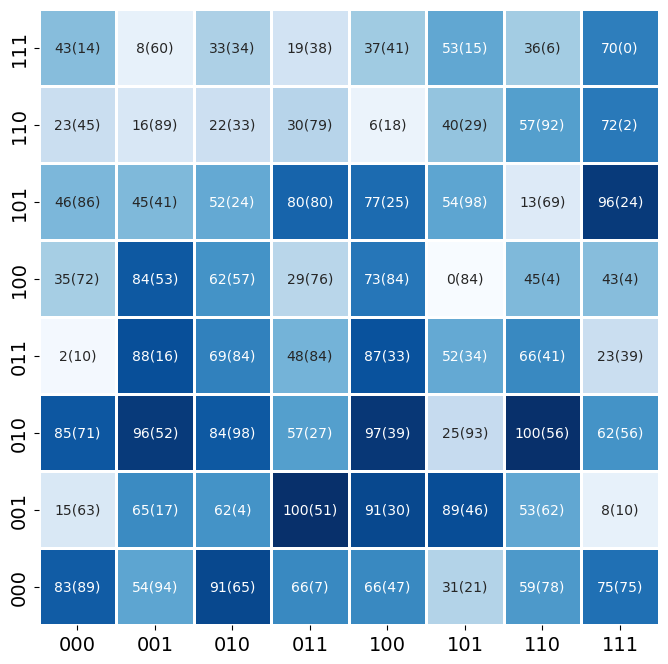

In [54]:
# Create a single heatmap
fig1, ax1 = make_heatmap(data1, annots)
#fig1.savefig('single_heatmap.png', bbox_inches='tight')

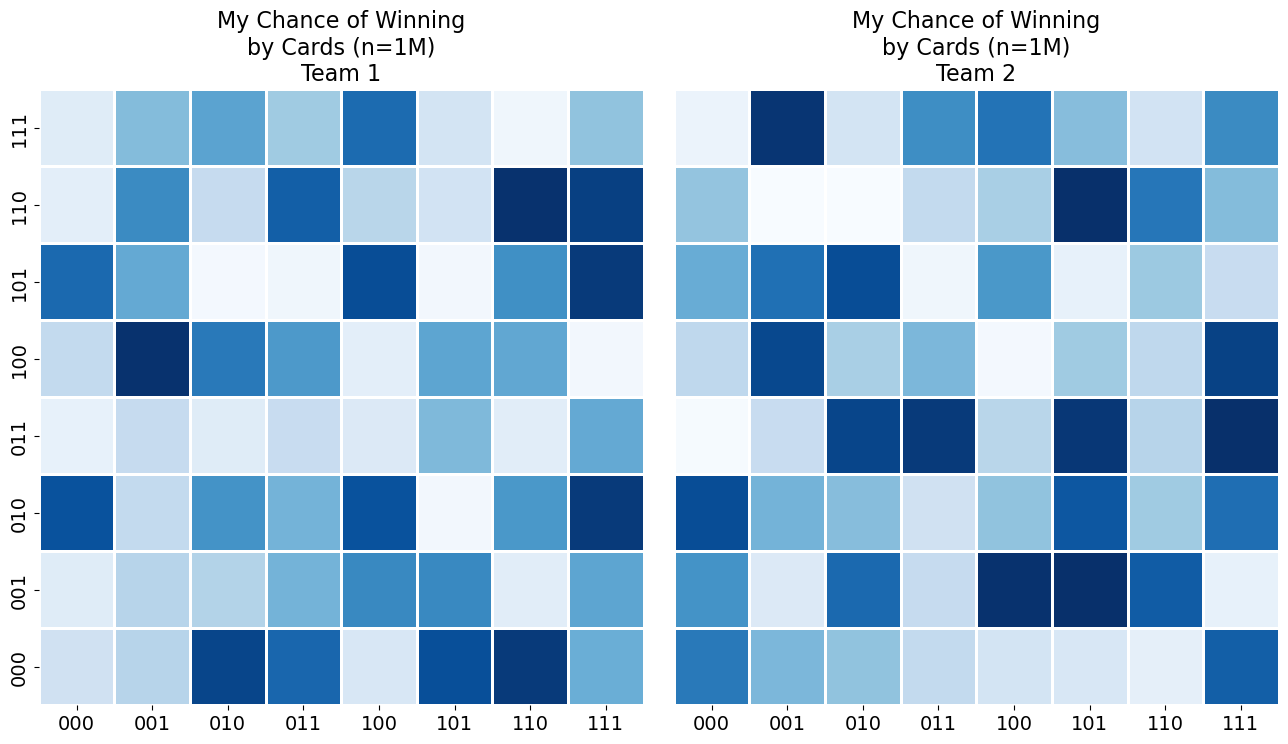

In [20]:
# Create a single figure with both heatmaps
fig, ax = make_heatmap_package(data1, data2)
fig.savefig('bundled_heatmaps.png', bbox_inches='tight', dpi=300)